In [1]:
# September 23rd, 2021
# Sao tres tabelas, patent_contractawardnumber, patent_govintorg e government_organization.
# De maior interesse e' o cruzamento entre as duas ultimas, para ver quais agencias contrataram quais patentes
# Tambem inclui um grafico do numero total de governmental patentes granted 

# February 14st, 2020
# Government patents

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#numero dos contratos
contract='data/patent_contractawardnumber.tsv.zip'
#patente-organization_id
pat_gov='data/patent_govintorg.tsv.zip'
#dados das organizacao
gov_org='data/government_organization.tsv.zip'

patent='data/cleanpatent.parquet.gz'

df_contract=pd.read_csv(contract, compression='zip', sep='\t')
df_pat_govt=pd.read_csv(pat_gov, compression='zip',  sep='\t', index_col='patent_id')
df_gov_org=pd.read_csv(gov_org, compression='zip',  sep='\t')
df_pat = pd.read_parquet(patent)

#df_class=pd.read_csv('data/wipo.tsv.zip', compression='zip', sep='\t')

In [4]:
df_contract.describe()

,patent_id,contract_award_number
count,127578,127578
unique,115286,60844
top,RE47026,DE-AC04-94AL85000
freq,23,2027


In [5]:
df_pat_govt.head()

,organization_id
patent_id,
10000026,10
10000036,35
10000377,10
10000377,47
10000384,31


In [6]:
df=df_pat_govt.merge(df_gov_org, left_on='organization_id', right_on='organization_id', how='inner')

In [7]:
df.head()

,organization_id,name,level_one,level_two,level_three
0,10,Department of Energy,Department of Energy,NaN,NaN
1,10,Department of Energy,Department of Energy,NaN,NaN
2,10,Department of Energy,Department of Energy,NaN,NaN
3,10,Department of Energy,Department of Energy,NaN,NaN
4,10,Department of Energy,Department of Energy,NaN,NaN


In [8]:
df_pat_govt.head()

,organization_id
patent_id,
10000026,10
10000036,35
10000377,10
10000377,47
10000384,31


In [20]:
dst='data/df_pat_govt.parquet.gz'
df_pat_govt = df_pat_govt.rename(columns={'organization_id': 'gov_organization_id'})
df_pat_govt.to_parquet(dst, compression='gzip')

In [11]:
#as colunas quali perdem o sentido quando agrupa
df.groupby('name').count().sort_values('gov_organization_id',ascending=False).head() 

,gov_organization_id,level_one,level_two,level_three
name,,,,
National Institutes of Health,34437,34437,34437,0
United States Government,26850,26850,0,0
Department of Energy,24960,24960,0,0
National Science Foundation,13890,13890,0,0
Air Force,8144,8144,8144,0


In [12]:
df.groupby('level_one').count().sort_values('gov_organization_id',ascending=False).head()

,gov_organization_id,name,level_two,level_three
level_one,,,,
Department of Health and Human Services,44927,44927,42602,7907
Department of Defense,38616,38616,34827,3334
Department of Energy,32937,32937,7977,39
United States Government,26850,26850,0,0
National Science Foundation,14003,14003,113,0


In [13]:
df.groupby('level_two').count().sort_values('gov_organization_id',ascending=False).head()

,gov_organization_id,name,level_one,level_three
level_two,,,,
National Institutes of Health,42319,42319,42319,7882
Navy,9223,9223,9223,1174
Air Force,8821,8821,8821,677
Army,8300,8300,8300,1240
Defense Advanced Research Projects Agency,6987,6987,6987,19


In [14]:
df_pat_govt.head()

,organization_id
patent_id,
10000026,10
10000036,35
10000377,10
10000377,47
10000384,31


In [15]:
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'

In [16]:
df_pat.describe()

,date,num_claims
count,7.430873e+06,7.430873e+06
mean,2.004755e+03,1.424143e+01
std,1.185321e+01,1.164018e+01
min,1.976000e+03,1.000000e+00
25%,1.997000e+03,6.000000e+00
50%,2.008000e+03,1.300000e+01
75%,2.015000e+03,2.000000e+01
max,2.020000e+03,8.870000e+02


In [17]:
df.tail()

,gov_organization_id,name,level_one,level_two,level_three
173132,218,Veterans Health Administration,Department of Veterans Affairs,Veterans Health Administration,NaN
173133,238,Bioenergy Technologies Office,Department of Energy,Office of Energy Efficiency and Renewable Energy,Bioenergy Technologies Office
173134,230,Critical Materials Institute,Department of Energy,Ames Laboratory,Critical Materials Institute
173135,266,Center for Gas Separations,Department of Energy,Office of Science,Center for Gas Separations
173136,267,Information Directorate,Department of Defense,Air Force,Air Force Research Laboratory


In [18]:
df2=df_pat.merge(df_contract, left_index=True, right_on='patent_id', how='inner')
df2.head()

,date,num_claims,patent_id,contract_award_number
0,2018,18,10000026,DE-FG36-08GO18135
1,2018,20,10000036,96-517 35
2,2018,20,10000377,DE-AC04-94AL85000
3,2018,12,10000384,CMMI 1120577
4,2018,12,10000384,N66001-08-1-2037


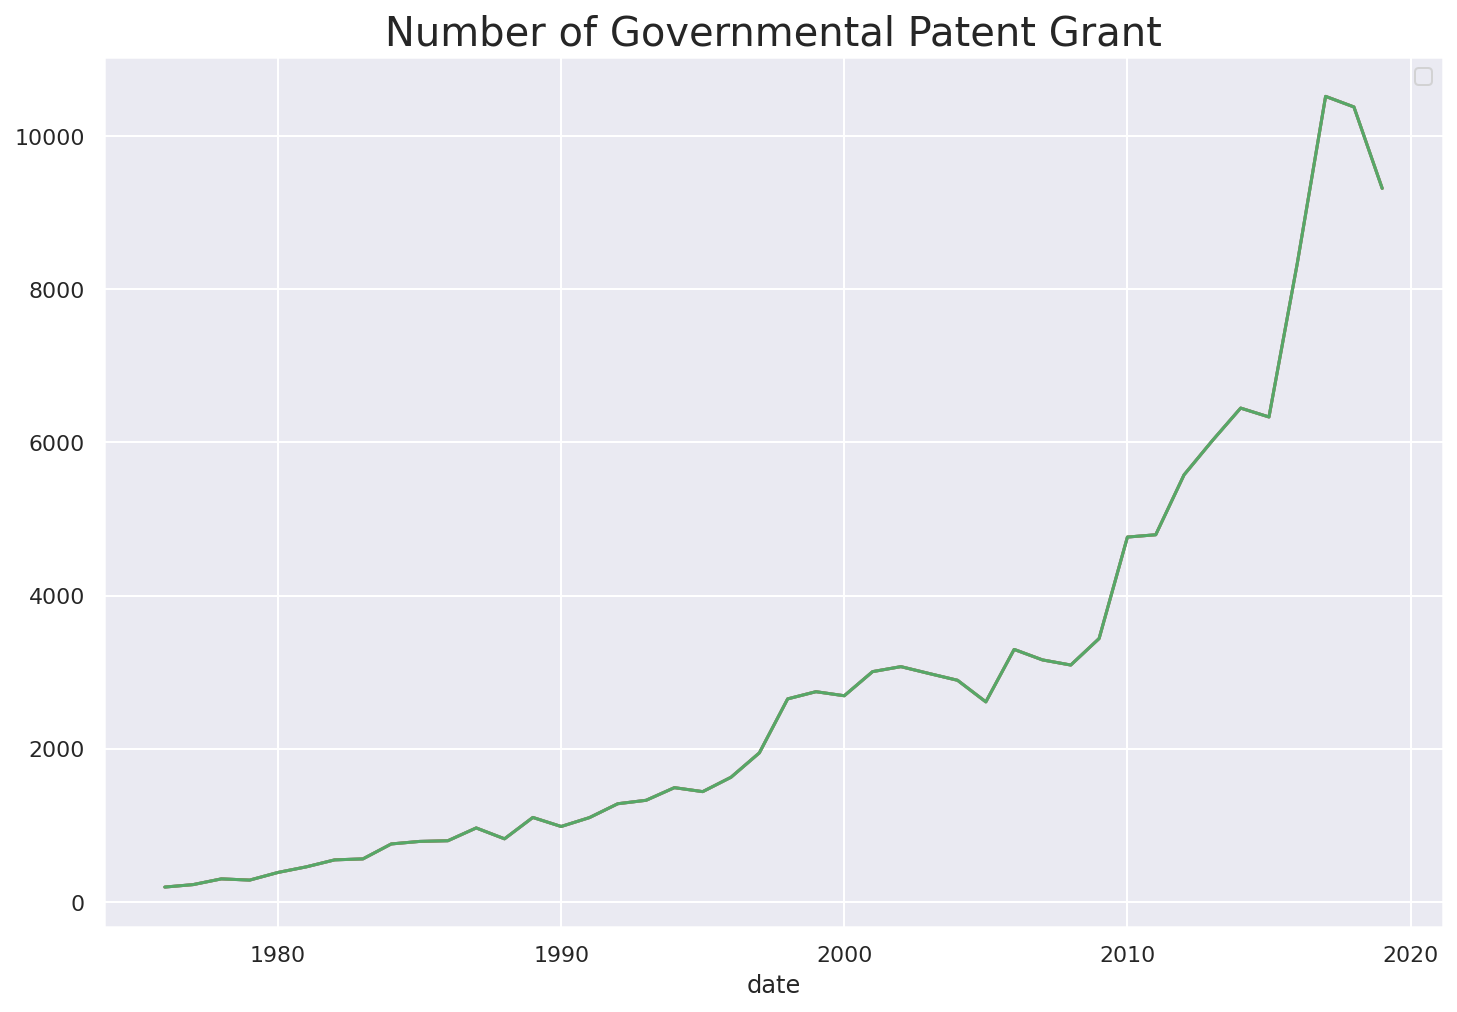

In [19]:
fig, ax=plt.subplots(figsize=(12,8))
df2.groupby('date').count().plot(ax=ax)
ax.set_title('Number of Governmental Patent Grant', fontsize=20)
plt.legend('')